# *Clustering* con K-means

Este notebook es una modificación [del de la profesora Cristina Gómez más detallado](https://github.com/cristinagom/machinelearning/blob/main/ejercicios/UD3-UnsupervisedLearning/ML_3.1_UnsupervisedLearning_Clustering/ML_3_1_UnsupervisedLearning_Clustering.ipynb).

## Introducción

La clusterización o ***clustering*** es una técnica de **aprendizaje no supervisado** que permite agrupar registros en grupos de características similares o ***clusters***.

**K-means** (o K-medias) es un algoritmo de *clustering* que agrupa los datos intentando separar las muestras en $K$ grupos preestablecidos, donde cada muestra pertencece al grupo cuya media (el **centroide** del *cluster*) es más cercana.

Los grupos se establecen minimizando la **inercia o  WCSS (Within-Cluster Sum of Squares)**, que es la suma de las distancias al cuadrado de cada muestra al centroide de su grupo.

El algoritmo K-means sigue los siguientes pasos:
1. Inicialización: Se eligen $K$ centroides iniciales de forma aleatoria o mediante algún método específico.
2. Asignación: Se asigna cada muestra al centroide más cercano.
3. Actualización: Se recalculan los centroides como la media de las muestras de cada grupo.
4. Repetición: Se repiten los pasos 2 y 3 hasta que los centroides no cambien (el algoritmo converge) o se alcance un número máximo de iteraciones.

[![K-means](img/K-means_convergence.gif)](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

## Creación de datos de prueba

Vamos a utilizar la función `make_blobs` de `sklearn.datasets` para generar datos de prueba. Esta función genera un conjunto de datos de puntos distribuidos en forma de nube de puntos. Le pasamos:
- `n_samples`: número de muestras total
- `n_features`: número de características de cada muestra. Vamos a trabajar con solo 2 *features* para poder visualizar los datos en 2D.
- `centers`: número de clusters que queremos generar
- `random_state`: semilla para la generación de números aleatorios
- `cluster_std`: desviación estándar de los clusters

Es importante recordar que estamos haciendo este proceso de represencación para ayudar a comprender el algoritmo, pero que normalmente trabajaremos con datasets de muchas más dimensiones donde no podremos visualizar los datos. De hecho, en este caso normalmente sería fácil dividir en clusters a simple vista. Y es que de hecho, estamos ya al general los datos de prueba con esta función `make_blobs` indicando el número de clusters que queremos que genere.

In [2]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=1000, # Número de muestras
                           n_features=2, # Número de características
                           centers=5, # Número de clusters
                           cluster_std=[0.5, 0.6, 0.8, 1, 1.1], # Desviación estándar de cada cluster
                           random_state=42,) # Semilla para reproducibilidad

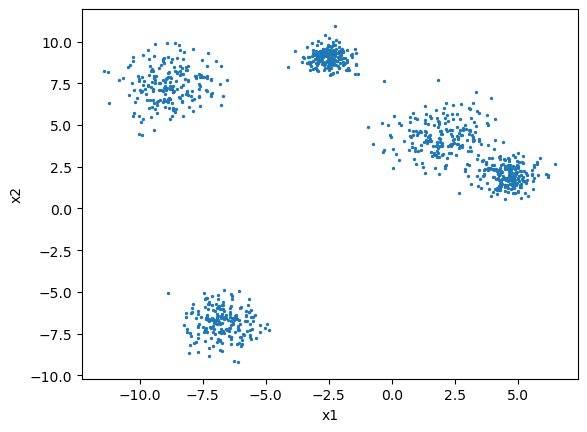

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Entrenamiento de K-means

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=5, # Número de clusters (valor k)
    n_init='auto') # Número de veces que se ejecuta el algoritmo con distintos centroides iniciales
y_pred = kmeans.fit_predict(X) # Equivalente a kmeans.fit(X) y luego y_pred = kmeans.predict(X)

c:\Users\Marcos\miniconda3\envs\env1-py311\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


El constructor de KMeans está recibiendo los siguientes parámetros:
* `n_clusters`: El numero de *clusters* a formar y el numero de centroides a generar. Es lo que estamos generando en bucle para encontrar el número óptimo de *clusters*.
* `init`: Método de inicializacion de los centroides. El más simple es 'random', pero por defecto utiliza 'k-means++', que es un método más sofisticado que intenta colocar los centroides iniciales lejos entre sí.
* `max_iter`: Numero maximo de iteraciones del algoritmo para una sola ejecucion.
* `n_init`: Numero de veces que el algoritmo sera ejecutado con diferentes centroides. El resultado final sera el mejor resultado de n_init ejecuciones consecutivas en terminos de inercia.

Ahora, con el array de WCSS, podemos utilizar el método del codo para determinar el número óptimo de clusters. El método del codo se basa en la variación de la inercia (WCSS) en función del número de clusters. Si aumentamos el número de clusters, la inercia disminuirá. El objetivo es elegir un número de clusters donde la inercia disminuya significativamente.

Al igual que otros estimadores de `scikit-learn`, KMeans tiene un método `fit_predict` que se puede usar para entrenar el modelo y predecir los clusters a los que pertenecen los datos. Este método devuelve una matriz de etiquetas de cluster, que asigna cada punto de datos a un cluster, pero además la asigna a la propiedad `labels_` del objeto KMeans.

Con el operador `is` podemos comprobar si dos variables apuntan a la misma dirección de memoria, es decir, si son el mismo objeto. En este caso, estamos comprobando si el atributo `labels_` del objeto KMeans es el mismo que la matriz de etiquetas que devuelve el método `fit_predict`.

In [5]:
y_pred is kmeans.labels_ 

True

Los centroides de los clusters se pueden obtener con el atributo `cluster_centers_`.

[[-6.72497097 -6.82513756]
 [-2.50910651  9.0216453 ]
 [ 4.56233973  2.00939543]
 [-8.82326814  7.40132883]
 [ 1.91789139  4.36682532]]


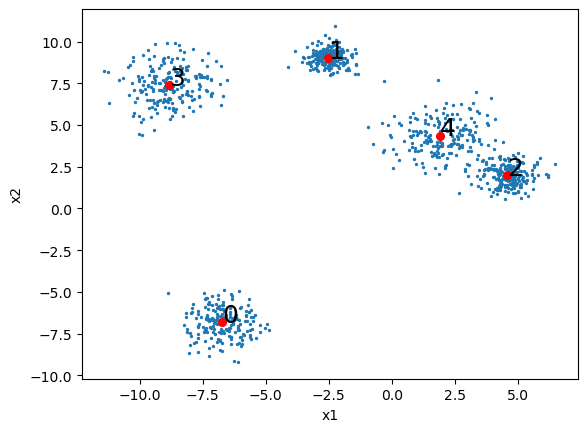

In [6]:
print(kmeans.cluster_centers_)
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r', s=30)

for i, center in enumerate(kmeans.cluster_centers_):
    plt.annotate(i, center, fontsize=18)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Podemos predecir fácilmente el clústers al que pertenece cada nueva instancia con el método `predict`.:

In [7]:
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, -2.5], [-3, 5]])
y_new = kmeans.predict(X_new)
y_new

array([4, 2, 4, 0, 1])

[[-6.72497097 -6.82513756]
 [-2.50910651  9.0216453 ]
 [ 4.56233973  2.00939543]
 [-8.82326814  7.40132883]
 [ 1.91789139  4.36682532]]


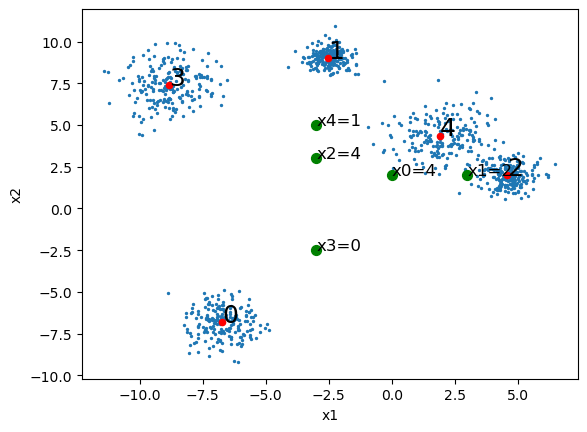

In [8]:
print(kmeans.cluster_centers_)
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r', s=20)
plt.scatter(X_new[:, 0], X_new[:, 1], c='g', s=50)

for i, center in enumerate(kmeans.cluster_centers_):
    plt.annotate(i, center, fontsize=18)
    
for i, point in enumerate(X_new): # Annotation for new points
    plt.annotate(f'x{i}={y_new[i]}', point, fontsize=12)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Al trazar los límites de decisión del algoritmo, obtenemos una teselación de [Voronoi](https://es.wikipedia.org/wiki/Pol%C3%ADgonos_de_Thiessen):

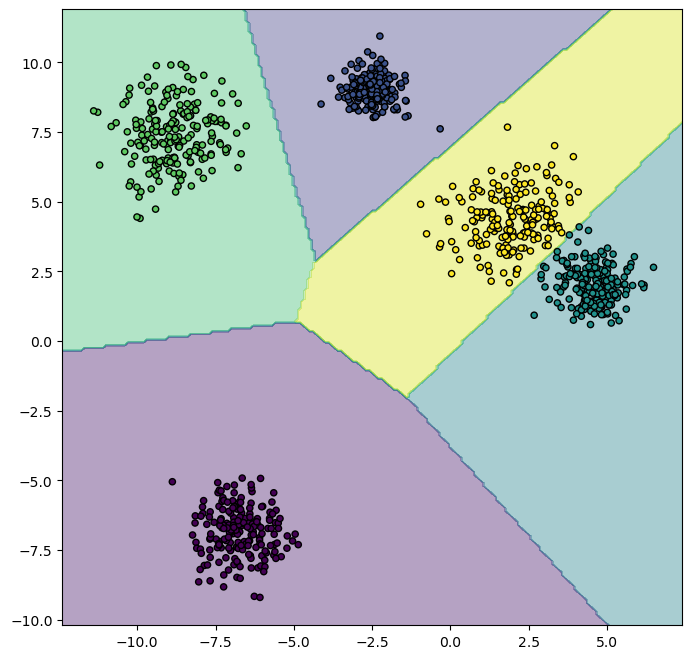

In [9]:
def plot_decision_regions(kmeans, X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Min and max values for x1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Min and max values for x2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                      np.arange(y_min, y_max, 0.1)) 
  
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 8))
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
  plt.show()
  
plot_decision_regions(kmeans,X)

La gran mayoría de las instancias se asignaron claramente a su clúster original.

Lo único que le importa a K-means es la distancia entre las instancias y los centroides. En lugar de asignar cada instancia a un clúster (agrupación dura), es mejor dar una puntuación de clúster por instancia (agrupación suave). La puntuación puede ser la distancia entre la instancia y los centroides.

El método `transform` mide la distancia entre cada instancia y los centroides.

In [10]:
kmeans.transform(X_new)

array([[11.09541741,  7.45648162,  4.5623494 , 10.34526045,  3.04633706],
       [13.13233084,  8.92489537,  1.56236798, 12.99861618,  2.60246444],
       [10.50755618,  6.04162135,  7.62694431,  7.29946213,  5.10429889],
       [ 5.70808406, 11.53209811,  8.80475038, 11.48680828,  8.44623856],
       [12.39795495,  4.05149446,  8.13220129,  6.29895483,  4.95848423]])

## Elección del número de clústeres (*Elbow Method*)

Podríamos estar pensando que podemos elegir el modelo con la inertia más baja. Esto plantea un problema porque aumentar `k` siempre nos dará una menor inercia (o distorsión).

El método del codo (o *elbow method*) es un heurístico utilizado para encontrar el número óptimo de clústeres en un algoritmo de clustering. La idea es ejecutarlo en bucle calculando la inercia y elegir el valor de k donde la inercia deja de disminuir rápidamente.

Visualicemos inertia como una función de `k`:

<img src="img/k_to_inertia.png" width="700" />

Como podemos ver, la distorsión (o inertia) cae mucho cuando pasamos de $3$ a $4$, pero luego disminuye mucho más lentamente y seguimos aumentando $k$. Esta curva tiene aproximadamente la forma de un brazo y hay un codo en $k=4$.

Sin embargo, hay que tener en consideración que este método es un tanto subjetivo y depende de la forma de los datos. 


In [11]:
inercia = []
K = range(1,10)
for k in K:
    model = KMeans(k).fit(X)
    inercia.append(model.inertia_)

c:\Users\Marcos\miniconda3\envs\env1-py311\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marcos\miniconda3\envs\env1-py311\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Marcos\miniconda3\envs\env1-py311\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marcos\miniconda3\envs\env1-py311\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

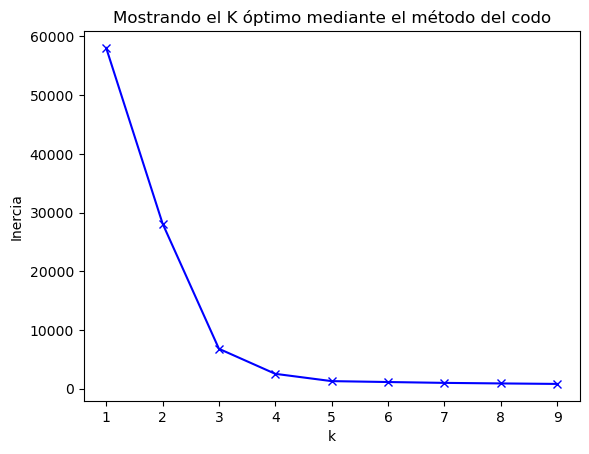

In [14]:
plt.plot(K, inercia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Mostrando el K óptimo mediante el método del codo')
plt.show()

## Limites de K-means

- `K-means` no es perfecto, por lo que es necesario ejecutar el algoritmo varias veces para evitar soluciones subóptimas.
- Otro factor limitante del algoritmo es que necesitamos especificar el número de clústers.
- `K-means` tampoco se comporta muy bien cuando los grupos tienen diferentes tamaños, diferentes densidades o formas no esféricas.
- Dependiendo de los datos, diferentes algoritmos de clustering pueden funcionar mejor (como `DBSCAN` o `Gaussian Mixtures`).
- Escalar las entradas con un Standard Scaler también es imprescindible con `K-means`.


## Material complementario

- https://cienciadedatos.net/documentos/py20-clustering-con-python.html
- https://dominalosdatos.com/algoritmo-kmeans/
- [StatQuest: K-means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)